<h3>1.Added Dropouts(To Switch off some Kernels while training) 
  <br>2.Added Learning Rate<h3>

<h3>Import Libraries and modules</h3>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add , BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


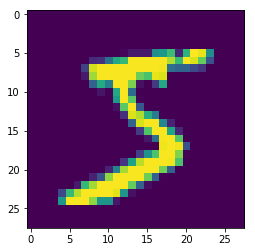

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:

from keras.layers import Activation
model1 = Sequential()


                                                                                  #input - conv - receptive feild
                                                                                  #input_conv|Receptive Field|output  

model1.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 |3x3|26x26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #26x26 |5x5|24x24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #24x24 |7x7|22x22
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(MaxPooling2D(pool_size=(2,2)))                                         #      |14x14|11x11    
model1.add(Convolution2D(10, 1, 1, activation='relu'))                                #11x11 |14x14|11x11 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #11x11 |16x16|9x9 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #9x9   |18x18|7x7 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                               #7x7   |20x20|5x5
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              #3x3   |24x24|1x1
model1.add(Convolution2D(10, 1, activation='relu'))
model1.add(Convolution2D(10,7))                                                   #using kernel size 7 directly.  

model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 22s 371us/step - loss: 0.1392 - acc: 0.9558 - val_loss: 0.0620 - val_acc: 0.9804
Epoch 2/10

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 22s 362us/step - loss: 0.0561 - acc: 0.9824 - val_loss: 0.0370 - val_acc: 0.9875
Epoch 3/10

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 20s 341us/step - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0526 - val_acc: 0.9831
Epoch 4/10

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 20s 340us/step - loss: 0.0388 - acc: 0.9880 - val_loss: 0.0386 - val_acc: 0.9882
Epoch 5/10

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.021312285379219975, 0.9934]


In [0]:
y_pred = model1.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.6507360e-13 3.2952061e-11 1.0832970e-08 1.9118493e-08 1.1363858e-16
  3.9505365e-12 1.2268553e-19 1.0000000e+00 1.7774541e-11 5.3665286e-08]
 [1.5367467e-08 3.5670186e-07 9.9999952e-01 1.2218110e-11 5.2851066e-09
  1.7691919e-13 5.9369798e-10 6.5369036e-08 9.5693703e-11 2.2406534e-12]
 [3.2635747e-10 9.9999940e-01 8.6981125e-08 3.7940467e-10 1.0828796e-07
  2.3262665e-07 3.7288867e-08 1.3132441e-07 2.4392153e-09 1.0141861e-09]
 [9.9924183e-01 2.0833122e-09 5.7053342e-07 1.3645377e-09 4.4603372e-08
  4.4484790e-07 7.4233726e-04 3.1756664e-07 1.0620800e-07 1.4281944e-05]
 [5.7556565e-10 5.4045263e-10 1.6326024e-10 1.7447296e-12 9.9988878e-01
  1.4159434e-09 2.6500539e-08 3.9684161e-07 3.0775111e-09 1.1073164e-04]
 [6.9136219e-10 9.9999666e-01 6.8470172e-08 9.9260470e-12 4.7419917e-07
  4.0997932e-08 5.5953340e-09 2.7150804e-06 8.7131402e-10 3.0787943e-09]
 [7.3405106e-13 5.4612408e-09 2.7050859e-07 8.2309966e-12 9.9995339e-01
  2.1335422e-10 2.2719976e-10 5.3575550e-06 1.0541098e-05 

<h3>Conclusion and observations</h3>

Steps Followed -:

1.Added Dropout and defined Learning rate explicitly

2.Parameters achieved - 13,238.



Drawback of network-:

3.Accuracy need to be matched 99.4 , getting Validation acc - 99.34 , Training acc - 99.34(need to be worked out more)